<a href="https://colab.research.google.com/github/ShaunakSen/Data-Science-and-Machine-Learning/blob/master/Color_Identification_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Color Identification in Images


> Credits: https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

### Basic operations with openCV 

<class 'numpy.ndarray'>
(525, 700, 3)


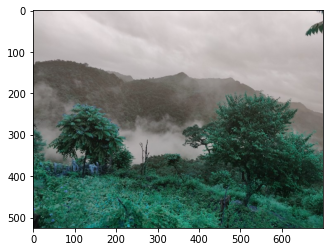

In [4]:
### read the image

image = cv2.imread("./sample_data/sample_image.jpeg")

print (type(image))

print (image.shape)

plt.imshow(image)


We see that the image has different colors as compared to the original image. This is because by default OpenCV reads the images in the color order BLUE GREEN RED i.e. BGR. Thus, we need to convert it into REG GREEN BLUE i.e. RGB.



(525, 700, 3)


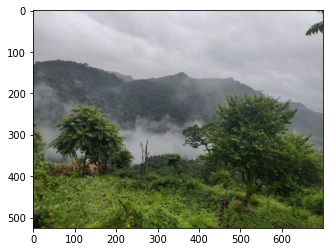

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print (image.shape)

plt.imshow(image)

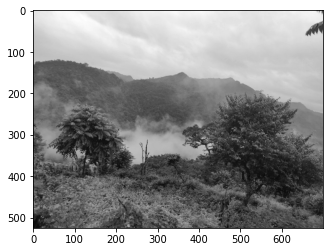

In [6]:
### The image can also be converted to grayscale if needed.

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

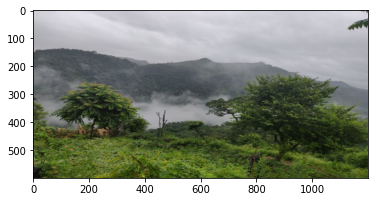

In [7]:
### We might want to resize the image to a certain size whenever the images are huge or when we are working with multiple images of different dimensions.

resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

### Color Identification

Not that we know a bit about OpenCV, let's start identifying colors from an image.

#### RGB to Hex conversion

First, we will define a function that can give us the hex values of our the colors that we will identify.

In [8]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

On reading the color which is in RGB space, we return a string. `{:02x}` simply displays the hex value for the respective color.

#### Read image in RGB color space

Next, we define a method that will help us get an image into Python in the RGB space.


In [9]:
def get_image(image_path):
    """
    1. Load the image
    2. Convert from BGR -> RGB space
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

#### Get colors from an image

We now define the complete code as a method that we can call to extract the top colors from the image and display them as a pie chart. I’ve named the method as `get_colors` and it takes 3 arguments:

1. image: The image whose colors we wish to extract.
2. number_of_colors: Total colors we want to extract.
3. show_chart: A boolean that decides whether we show the pie chart or not.



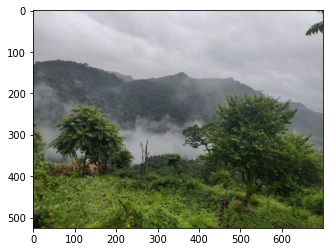

In [11]:
plt.imshow(image)

In [12]:
### resize the image

"""
The size of the image can be specified manually, or you can specify the scaling factor. 
Different interpolation methods are used. Preferable interpolation methods are cv2.INTER_AREA for shrinking 
and cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR for zooming. By default, interpolation method used is cv2.INTER_LINEAR for all resizing purposes.
"""
print (image.shape)

modified_image = cv2.resize(image, (600, 400), cv2.INTER_AREA)

print (modified_image.shape)

(525, 700, 3)
(400, 600, 3)


In [13]:
### KMeans expects the input to be of two dimensions, so we use Numpy’s reshape function to reshape the image data.

modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], modified_image.shape[2])

print (modified_image.shape)

(240000, 3)


KMeans algorithm creates clusters based on the supplied count of clusters. In our case, it will form clusters of colors and these clusters will be our top colors. We then fit and predict on the same image to extract the prediction into the variable labels.


Input shape: 240000, 3

So consider we have 240k rows with 3 cols

And we are running the KMEANS algorithm for this data

So basically each row will get assigned to one of the K clusters based on a distance metric

So closer rows get assigned to one cluster

So we have a 400 x 600 image with 3 channels : R G B

Think like a hypercube

We flatten this cube face into 240k rows and the 3 columns which correspond to the R G and B values still

So basically each row represent the pixel values for R, G and B colors and the closer two rows are basically closer 2 colors are

So we use KMeans to detect these close rows and indirectly we end up detecting the main colors